# Making classification dataset

In [ ]:
from sklearn.datasets import make_classification
X,y = make_classification(n_features = 4,n_classes=2)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

# Standardizing Formula

In [ ]:
import numpy as np

def standardize(X_tr):
    for i in range(X_tr.shape[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
    return X_tr

In [ ]:
X_train = standardize(X_train)
X_test  = standardize(X_test)

# Logisitc Regression from scratch

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def cost_function(X,y,theta):
  n = len(y)
  h = sigmoid(X.dot(theta))
  return (-1/n)*np.sum(y*np.log(h) + (1-y)*np.log(1-h))

def gradient_descent(X, y, theta, learning_rate, iterations):
  m = len(y)

  for i in range(iterations):
    h = sigmoid(X.dot(theta))
    theta -= learning_rate * (1/m) * X.T.dot(h - y)

  return theta

def predict(X, theta):

  return np.round(sigmoid(X.dot(theta)))

In [ ]:
theta = np.zeros(X.shape[1])
lr = 0.001
iterations = 930
theta = gradient_descent(X_train , y_train , theta , lr , iterations)
prediction = predict(X_test , theta)

# F1 score from scratch

In [ ]:
def F1_score(pred , y_test):
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for x,y in zip(pred , y_test):
    if y == 1:
      if x==y:
        TP += 1
      else:
        FP += 1
    else:
      if x == y:
        TN += 1
      else:
        FN += 1
  precision = TP/(TP + FP)
  recall = TP/(TP + FN)

  return (2*precision*recall/(precision + recall))


In [ ]:
print(f"F1 Score is {F1_score(prediction , y_test)}")

F1 Score is 1.0


# Logistic Regression using scikit learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

log = LogisticRegression()
log.fit(X_train , y_train)
y_pred = log.predict(X_test)

print(f"F1 score is {f1_score(y_pred , y_test)}")

F1 score is 1.0


# Logistic Regression on Iris dataset

In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/Iris.csv")

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Accuracy of logistic Regression on Iris dataset

In [ ]:
from sklearn.metrics import accuracy_score

log1 = LogisticRegression(multi_class = "auto" , random_state = 42)
log1.fit(X_train , y_train)
y_pred = log1.predict(X_test)
print(f"Accuracy is {accuracy_score(y_pred , y_test)}")

Accuracy is 1.0


In [ ]:
weights , params = [] , []
for c  in np.arange(0,5):
  params.append(10**c)
  lr = LogisticRegression(C = 10**c , multi_class = "auto" , random_state = 42)
  lr.fit(X_train , y_train)
  weights.append(lr.coef_[1])

weights = np.array(weights)


# Checkinng for optimal value of C

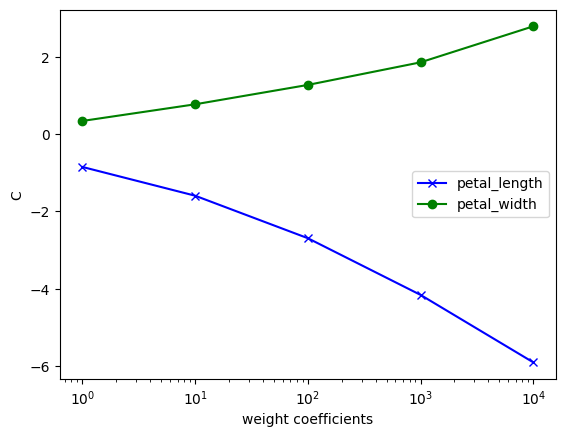

In [ ]:
import matplotlib.pyplot as plt

plt.plot(params , weights[:,0] , color= "blue" , marker = "x" , label = "petal_length")
plt.plot(params , weights[:,1] , color= "green" , marker = "o" , label = "petal_width")
plt.xlabel("weight coefficients")
plt.ylabel("C")
plt.legend(loc = "right")
plt.xscale("log")
plt.show()

# Plotting boundary of class label for Iris dataset

<ipython-input-261-0857d92b8d11>:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


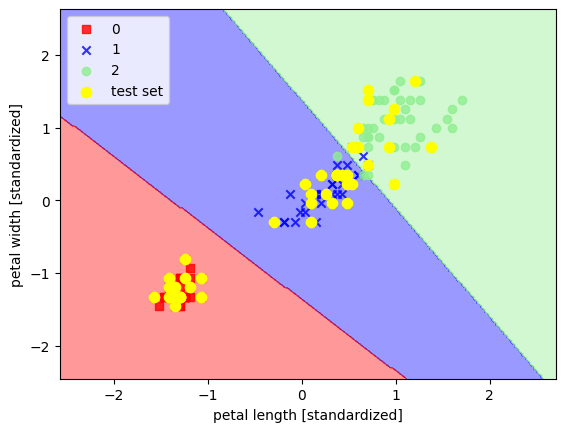

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
# Decision region drawing
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='Yellow',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined, classifier=lr,
                      test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Conclusion : Implementaion of logistic regression from scratch  , making dataset for classification using make_plots and implementing logistic regression using sklearn library of python